In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('modified_synthetic_economic_data.csv')
df1.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


### Remove unwanted column

In [3]:
df = df1.drop(columns=['year','month'],axis=1)

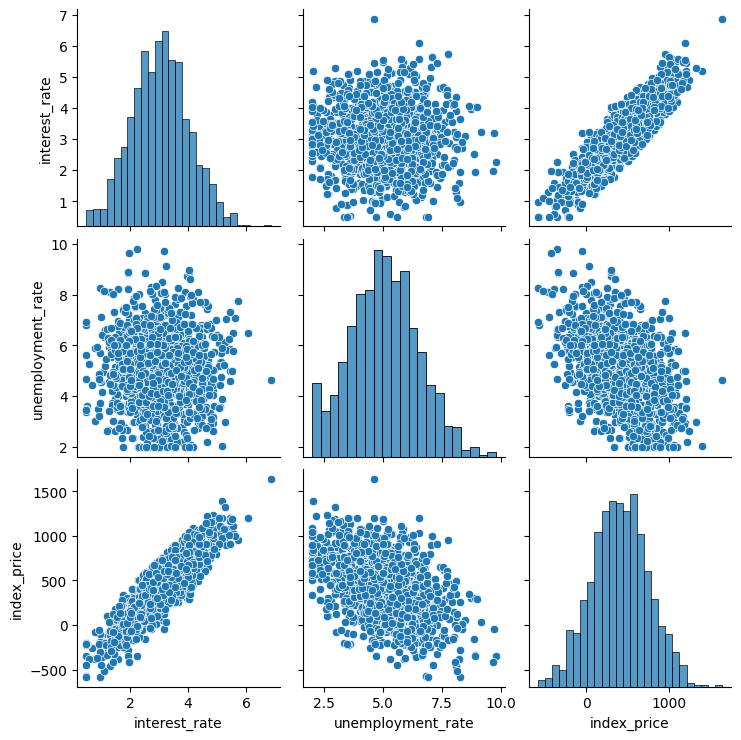

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


<Axes: >

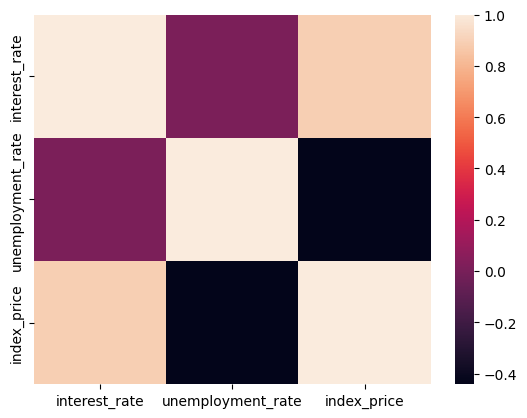

In [6]:
sns.heatmap(df.corr())

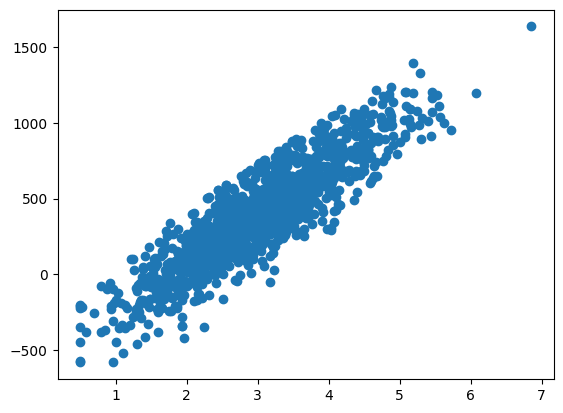

In [7]:
plt.scatter(df['interest_rate'],df['index_price'])

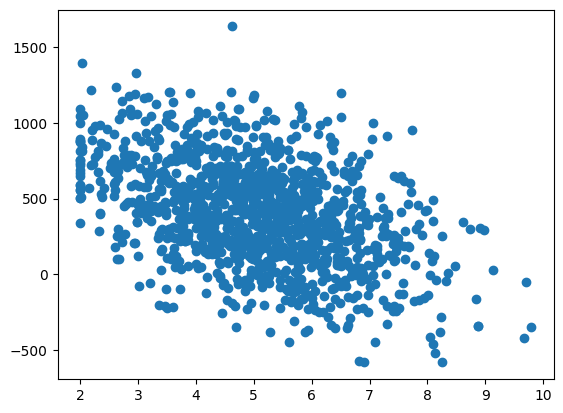

In [8]:
plt.scatter(df['unemployment_rate'],df['index_price'])

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


### find independet and depemdent veriable

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_tarin,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

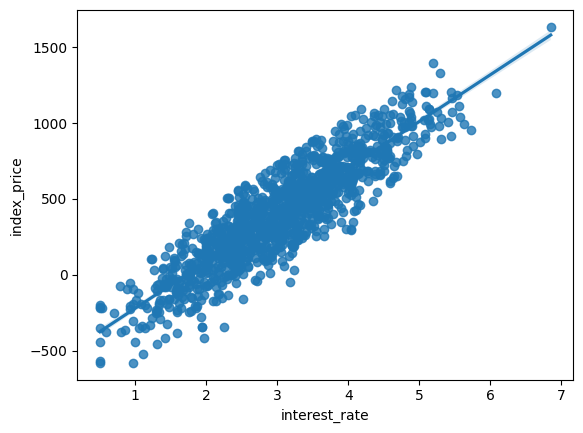

In [12]:
sns.regplot(x = df['interest_rate'],y = df['index_price'])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tarin = sc.fit_transform(X_tarin)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_tarin,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


## cross validation

In [15]:

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(reg,X_tarin,y_train,scoring='neg_mean_squared_error',
                                cv=3)


In [16]:
np.mean(validation_score)

np.float64(-0.6794977536162428)

In [17]:
## prediction
y_pred=reg.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.2843255620646633
0.21605725330793157
0.5332218694546045


In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9999975863799279
0.9999975701265941


In [20]:
reg.predict(sc.transform(np.array([[2.53,3.96]])))

/Users/apple/AI_ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([365.43731614])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.21605725330793157
Mean Squared Error (MSE): 0.2843255620646633
Root Mean Squared Error (RMSE): 0.5332218694546045
R² Score: 0.9999975863799279


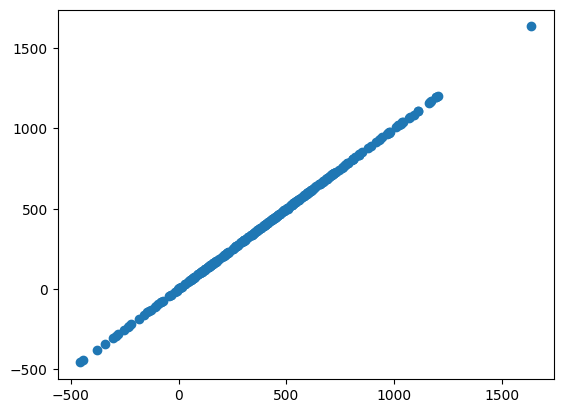

In [22]:
plt.scatter(y_test,y_pred)